## Final Project 602

by Benson Toi

### Research Question

What types of jobs are in the current job market? How does this help you find a job fulfilling most of your needs? This research will focus on Entry level and experience non-manager level job. 


### Justification

Many people are losing their job this year while the economy is unstable. How can we secure our job and stay competitive in NYC? In this project, I want to get information to build a career or change career that can remain in the current or future job market. 

### Data Sources

The dataset I am using is the City Government NYC Job listing from NYC DATA. Link source:(https://data.cityofnewyork.us/City-Government/NYC-Jobs/kpav-sd4t).


### Libraries 

Pandas Library : To manipulate the data in the from of a dataframe from a csv file.
Numpy Library : To numerical data.
Matplotlab Library : To visualization data.
Seaborn Library : For more interactive visualization on top of the matplotlib data. 
Scikit-learn Library : For KNN modal to train data set

### EDA and summary statistics

1) Load the data
2) Clean, correct format and checking missing value in the data
3) Identify the types of data and wrangling it. 
4) Calculate summary statistics such as mean, median, mode, standard deviation, minimum, and maximum for numeric variables. For categorical variables, calculate the frequency and percentage of each category.
5) Create visualizations such as histograms, box plots, scatter plots, and bar charts to visualize the distribution and relationships between variables.
6) Analyze the data to identify patterns or relationships between variables, such as correlations or trends.
7) Draw a conclusions

#### Here are some summary statistics will be use to calculate for a dataset of NYC job postings:

1) Number of job postings
2) Average salary
3) Number of job postings by industry
4) Most common job titles
5) Skills required for certain job catogery 
6) Visualizations


### Data Loading and Library Import

In [33]:
# Import lib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

df = pd.read_csv('NYC_Jobs.csv')
#df.head()

### Data Wrangling

1) Renaming variable
2) Converting data type
3) Drop Null Value
4) Create new variable with calculation
5) Drop Variable
6) Remove unreable character
7) Drop NaN records
8) Create new Dataframe with filter for study research only (Full time Job)

In [34]:
# Modify multiple column names
rename_dict = {'# Of Positions': 'Number of Position', 'Full-Time/Part-Time indicator': 'Job Type'}
df = df.rename(columns=rename_dict)

# Convert the string to date data type
df['Posting Date'] = pd.to_datetime(df['Posting Date'])
df['Posting Updated'] = pd.to_datetime(df['Posting Updated'])
df['Process Date'] = pd.to_datetime(df['Process Date'])

# Check any Null Value and drop it in 
df.isna().any(axis=0)

# Create new columns based on existing columns or calculations.
df['Average_Salary'] = (df['Salary Range From'] + df['Salary Range To'] )/2
df['Job_Category_Type'] = df['Job Category'].str.extract('(\w+)')

# Drop Unused Column
df = df.drop('Post Until', axis=1)
df = df.drop('Recruitment Contact', axis=1)
df = df.drop('Work Location 1', axis=1)
df = df.drop('Additional Information', axis=1)
df = df.drop('Hours/Shift', axis=1)

# Remove non-ASCII characters from the Minimum Qual Requirements column
df['Preferred Skills'] = df['Preferred Skills'].str.encode('ascii', 'ignore').str.decode('ascii')




# Drop Nan Records
df = df.dropna()
num_rows_updated = len(df)

# Create new dataframe for some specific analysis (filtering and sorting)
# Only full time job with annual salary listing is used here.
job_ft_salary_fullset_df = df[(df["Job Type"]=='F') & (df["Salary Frequency"] == "Annual")] 

job_ft_salary_df = job_ft_salary_fullset_df.loc[:, ['Job_Category_Type', 'Average_Salary', 'Career Level']]
job_ft_salary_df = job_ft_salary_df.sort_values(["Job_Category_Type", "Average_Salary"],ascending =[True,True])

# Convert all the string values to upper or lower cases in one column.
job_ft_salary_df['Job_Category_Type'] = df['Job_Category_Type'].str.upper()

# Check whether numeric values are present in a given column of your dataframe.
is_numeric = pd.to_numeric(job_ft_salary_df['Average_Salary'], errors='coerce').notnull().all()

### Visualization
#### Salary

All job Catergory break down into 14 industrials (Administration, Building, Clerical, Communcation, Constituent, Engineering, Finance, Health, Information, Legal, Policy, Public, Social, Technology).

Career level have 4 different level which is Entry Level, Experienced Non-Manager, Manager, and Executive.

Below Charts shown the mean value of average salary from each job catergory by Career level. 

Based on the charts, The industry in Information have highest average salary in Entry level and experience non manager level. Following by Finance and Engineering. 

Text(0, 0.5, 'Average Salary (Mean Value)')

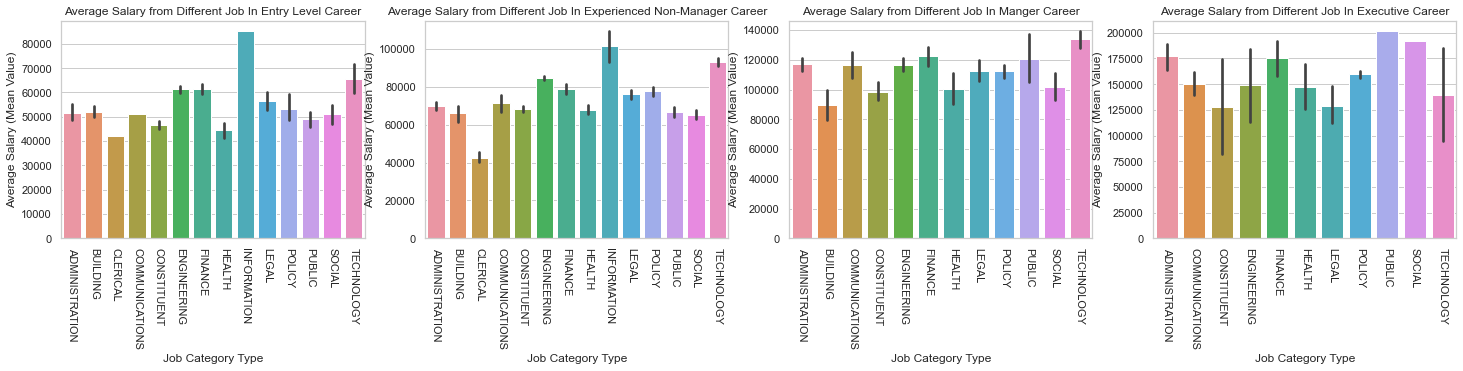

In [35]:
#Visualization Part 1 ( i need break down level of career show it in 4 different plot)
job_ft_entry_career_salary_df = job_ft_salary_df[(job_ft_salary_df["Career Level"]=="Entry-Level")] 
job_ft_non_manager_career_salary_df = job_ft_salary_df[(job_ft_salary_df["Career Level"]=="Experienced (non-manager)")] 
job_ft_entry_manager_career_salary_df = job_ft_salary_df[(job_ft_salary_df["Career Level"]=="Manager")] 
job_ft_executive_career_salary_df = job_ft_salary_df[(job_ft_salary_df["Career Level"]=="Executive")] 

# Create a bar chart with Seaborn
sns.set_style("whitegrid")

# Create a figure with 3 subplots and set the figures size
fig, axs = plt.subplots(ncols=4, figsize=(25, 4))

sns.barplot(x='Job_Category_Type', y='Average_Salary', data=job_ft_entry_career_salary_df, ax=axs[0])
# Set the chart title and axis labels
axs[0].tick_params(axis='x', rotation=270)
axs[0].set_title('Average Salary from Different Job In Entry Level Career')
axs[0].set_xlabel('Job Category Type')
axs[0].set_ylabel('Average Salary (Mean Value)')

sns.barplot(x='Job_Category_Type', y='Average_Salary', data=job_ft_non_manager_career_salary_df, ax=axs[1])
# Set the chart title and axis labels
axs[1].tick_params(axis='x', rotation=270)
axs[1].set_title('Average Salary from Different Job In Experienced Non-Manager Career')
axs[1].set_xlabel('Job Category Type')
axs[1].set_ylabel('Average Salary (Mean Value)')

sns.barplot(x='Job_Category_Type', y='Average_Salary', data=job_ft_entry_manager_career_salary_df, ax=axs[2])
# Set the chart title and axis labels
axs[2].tick_params(axis='x', rotation=270)
axs[2].set_title('Average Salary from Different Job In Manger Career')
axs[2].set_xlabel('Job Category Type')
axs[2].set_ylabel('Average Salary (Mean Value)')

sns.barplot(x='Job_Category_Type', y='Average_Salary', data=job_ft_executive_career_salary_df, ax=axs[3])
# Set the chart title and axis labels
axs[3].tick_params(axis='x', rotation=270)
axs[3].set_title('Average Salary from Different Job In Executive Career')
axs[3].set_xlabel('Job Category Type')
axs[3].set_ylabel('Average Salary (Mean Value)')

#### Job Market Demand 
However, the industry of Informaton job market demand is low. 

Based on the charts below, explained the job market demand on each industries. Which Engineering and constituent have the highest demand in current job market.

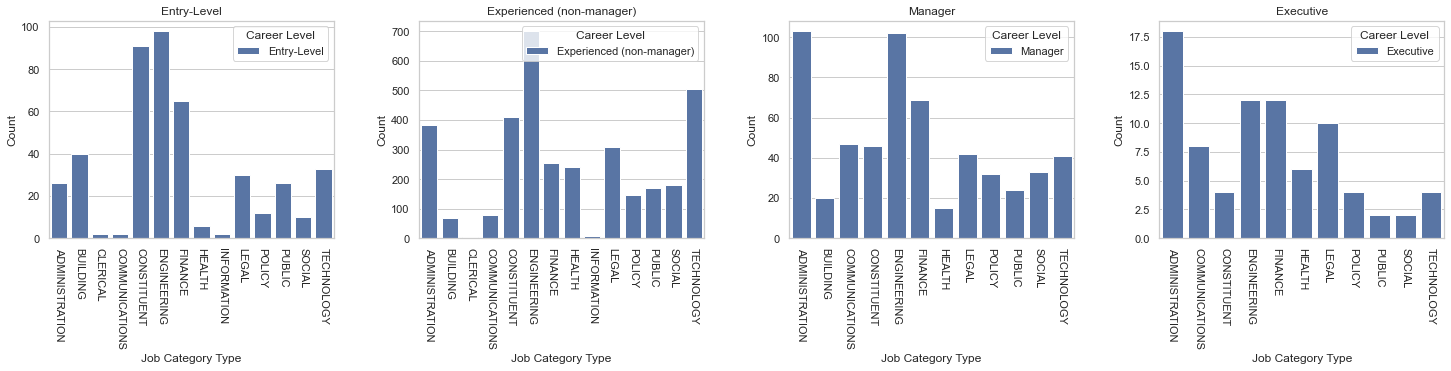

In [36]:
# Count Job Catergory type break down with career level


sns.set(style="whitegrid")
fig, axs = plt.subplots(ncols=4, figsize=(25, 4))

sns.countplot(x="Job_Category_Type", hue="Career Level", data=job_ft_entry_career_salary_df, ax=axs[0])
axs[0].tick_params(axis='x', rotation=270)
axs[0].set_title("Entry-Level")
axs[0].set_xlabel("Job Category Type")
axs[0].set_ylabel("Count")

sns.countplot(x="Job_Category_Type", hue="Career Level", data=job_ft_non_manager_career_salary_df, ax=axs[1])
axs[1].tick_params(axis='x', rotation=270)
axs[1].set_title("Experienced (non-manager)")
axs[1].set_xlabel("Job Category Type")
axs[1].set_ylabel("Count")


sns.countplot(x="Job_Category_Type", hue="Career Level", data=job_ft_entry_manager_career_salary_df, ax=axs[2])
axs[2].tick_params(axis='x', rotation=270)
axs[2].set_title("Manager")
axs[2].set_xlabel("Job Category Type")
axs[2].set_ylabel("Count")

sns.countplot(x="Job_Category_Type", hue="Career Level", data=job_ft_executive_career_salary_df, ax=axs[3])
axs[3].tick_params(axis='x', rotation=270)
axs[3].set_title("Executive")
axs[3].set_xlabel("Job Category Type")
axs[3].set_ylabel("Count")

# Adjust the spacing between plots
plt.subplots_adjust(hspace=0.5, wspace=0.3)

# Display the plots
plt.show()

#### Job Market Demand Trend
We can see the job market demand trend here, which show the increasing demand in Consituent, Engineering, Technology, Finance, and Social at enrty level position. 

And increasing demand in Consituent, Engineering, and Social at exeperince non manager position.

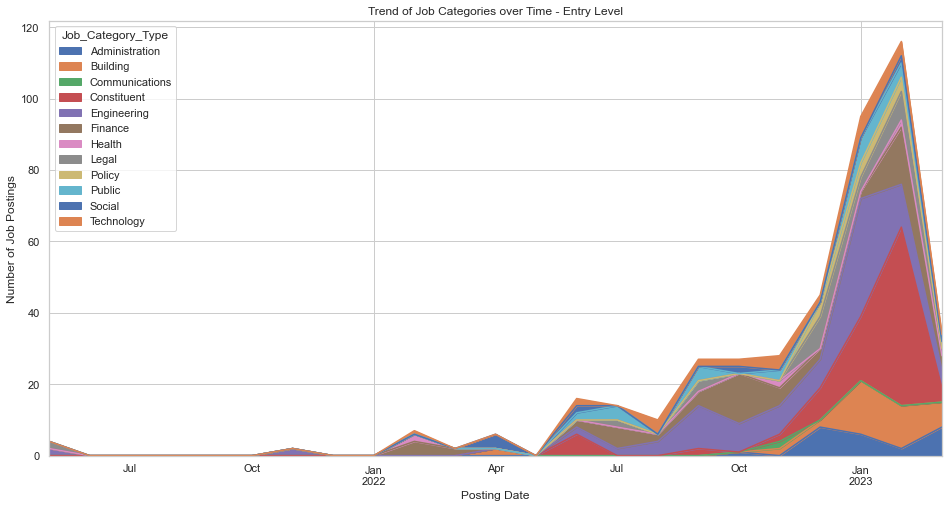

In [37]:
job_ft_entry_fullset_salary_df = job_ft_salary_fullset_df[(job_ft_salary_fullset_df["Career Level"]=="Entry-Level")] 


job_posting_df = job_ft_entry_fullset_salary_df.loc[:, ['Job_Category_Type', 'Posting Date']]

# Filter the data to only include postings after January 1, 2021
job_posting_df = job_posting_df[job_posting_df['Posting Date'] >= '2021-01-01']


job_ft_entry_fullset_salary_df = job_ft_salary_fullset_df[(job_ft_salary_fullset_df["Career Level"]=="Entry-Level")] 


# Extract the year and month from the Posting Date column
job_posting_df['Year'] = job_posting_df['Posting Date'].dt.year
job_posting_df['Month'] = job_posting_df['Posting Date'].dt.month

# Group the data by Posting Date and Job Category, and count the number of job postings
grouped_df = job_posting_df.groupby(['Posting Date', 'Job_Category_Type']).size().reset_index(name='Count')

# Pivot the data to get a table with Posting Date as index, Job Category as columns, and the count as values
pivoted_df = grouped_df.pivot(index='Posting Date', columns='Job_Category_Type', values='Count')

# Resample the data to get monthly counts
resampled_df = pivoted_df.resample('M').sum()

# Create a stacked area chart of the counts for each Job Category over time
ax = resampled_df.plot.area(stacked=True, figsize=(16, 8), title='Trend of Job Categories over Time - Entry Level')
ax.set_xlabel('Posting Date')
ax.set_ylabel('Number of Job Postings')
plt.show()


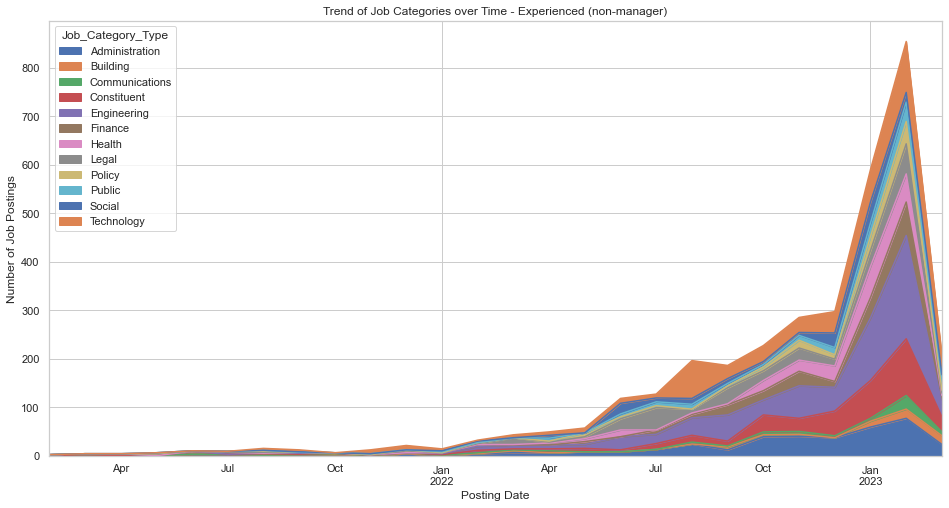

In [38]:
job_ft_exp_fullset_salary_df = job_ft_salary_fullset_df[(job_ft_salary_fullset_df["Career Level"]=="Experienced (non-manager)")] 


job_exp_posting_df = job_ft_exp_fullset_salary_df.loc[:, ['Job_Category_Type', 'Posting Date']]

# Filter the data to only include postings after January 1, 2021
job_exp_posting_df = job_exp_posting_df[job_exp_posting_df['Posting Date'] >= '2021-01-01']


# Extract the year and month from the Posting Date column
job_exp_posting_df['Year'] = job_exp_posting_df['Posting Date'].dt.year
job_exp_posting_df['Month'] = job_exp_posting_df['Posting Date'].dt.month

# Group the data by Posting Date and Job Category, and count the number of job postings
grouped_df = job_exp_posting_df.groupby(['Posting Date', 'Job_Category_Type']).size().reset_index(name='Count')

# Pivot the data to get a table with Posting Date as index, Job Category as columns, and the count as values
pivoted_df = grouped_df.pivot(index='Posting Date', columns='Job_Category_Type', values='Count')

# Resample the data to get monthly counts
resampled_df = pivoted_df.resample('M').sum()

# Create a stacked area chart of the counts for each Job Category over time
ax = resampled_df.plot.area(stacked=True, figsize=(16, 8), title='Trend of Job Categories over Time - Experienced (non-manager)')
ax.set_xlabel('Posting Date')
ax.set_ylabel('Number of Job Postings')
plt.show()


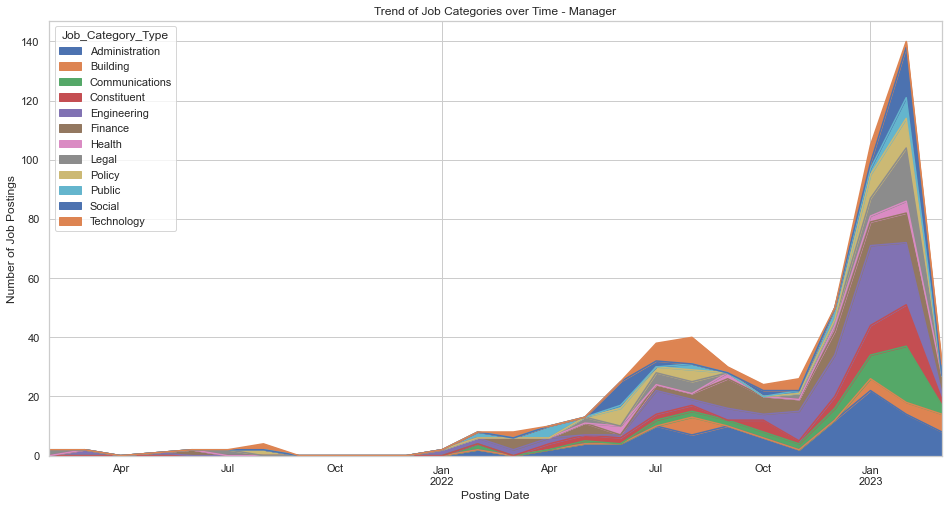

In [39]:
job_ft_manager_fullset_salary_df = job_ft_salary_fullset_df[(job_ft_salary_fullset_df["Career Level"]=="Manager")] 


job_manager_posting_df = job_ft_manager_fullset_salary_df.loc[:, ['Job_Category_Type', 'Posting Date']]

# Filter the data to only include postings after January 1, 2021
job_manager_posting_df = job_manager_posting_df[job_manager_posting_df['Posting Date'] >= '2021-01-01']


# Extract the year and month from the Posting Date column
job_manager_posting_df['Year'] = job_manager_posting_df['Posting Date'].dt.year
job_manager_posting_df['Month'] = job_manager_posting_df['Posting Date'].dt.month

# Group the data by Posting Date and Job Category, and count the number of job postings
grouped_df = job_manager_posting_df.groupby(['Posting Date', 'Job_Category_Type']).size().reset_index(name='Count')

# Pivot the data to get a table with Posting Date as index, Job Category as columns, and the count as values
pivoted_df = grouped_df.pivot(index='Posting Date', columns='Job_Category_Type', values='Count')

# Resample the data to get monthly counts
resampled_df = pivoted_df.resample('M').sum()

# Create a stacked area chart of the counts for each Job Category over time
ax = resampled_df.plot.area(stacked=True, figsize=(16, 8), title='Trend of Job Categories over Time - Manager')
ax.set_xlabel('Posting Date')
ax.set_ylabel('Number of Job Postings')
plt.show()


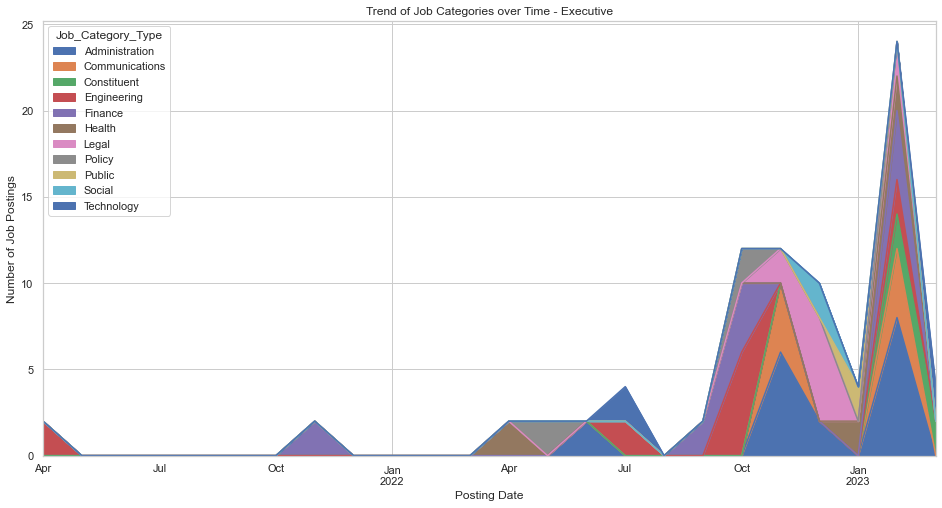

In [40]:
job_ft_executive_fullset_salary_df = job_ft_salary_fullset_df[(job_ft_salary_fullset_df["Career Level"]=="Executive")] 


job_ft_executive_fullset_salary_df = job_ft_executive_fullset_salary_df.loc[:, ['Job_Category_Type', 'Posting Date']]

# Filter the data to only include postings after January 1, 2021
job_ft_executive_fullset_salary_df = job_ft_executive_fullset_salary_df[job_ft_executive_fullset_salary_df['Posting Date'] >= '2021-01-01']


# Extract the year and month from the Posting Date column
job_ft_executive_fullset_salary_df['Year'] = job_ft_executive_fullset_salary_df['Posting Date'].dt.year
job_ft_executive_fullset_salary_df['Month'] = job_ft_executive_fullset_salary_df['Posting Date'].dt.month

# Group the data by Posting Date and Job Category, and count the number of job postings
grouped_df = job_ft_executive_fullset_salary_df.groupby(['Posting Date', 'Job_Category_Type']).size().reset_index(name='Count')

# Pivot the data to get a table with Posting Date as index, Job Category as columns, and the count as values
pivoted_df = grouped_df.pivot(index='Posting Date', columns='Job_Category_Type', values='Count')

# Resample the data to get monthly counts
resampled_df = pivoted_df.resample('M').sum()

# Create a stacked area chart of the counts for each Job Category over time
ax = resampled_df.plot.area(stacked=True, figsize=(16, 8), title='Trend of Job Categories over Time - Executive')
ax.set_xlabel('Posting Date')
ax.set_ylabel('Number of Job Postings')
plt.show()


#### KNN model
By using KNN to predict average salary, minimum qualification requirements, and skills based on the job category. With n_neighbours = 6, the model have the highest KNN prediction accuracy between 0.6 to 0.65. 

I am going deeper into the industrial that have high demand industrials and great potential in future salary in higher position. Which is Engineering, Constituent, and Administration.





* Convert the textual data in the Minimum Qual Requirements column into a numerical format that can be used by the KNN algorithm. (text vectorization)


In [41]:

job_ft_entry_career_knn_df = job_ft_entry_career_salary_df.loc[:, ['Job_Category_Type', 'Average_Salary']]

# Separate the features and target variable
X = job_ft_entry_career_knn_df[['Job_Category_Type']]
y = job_ft_entry_career_knn_df['Average_Salary']

# One-hot encode the categorical variable
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X)

# Train the KNN model
knn = KNeighborsRegressor(n_neighbors=6)
knn.fit(X_encoded, y)

# Predict the salary for a new job category
new_job_category = pd.DataFrame({'Job_Category_Type': ['ENGINEERING']})
new_job_category_encoded = encoder.transform(new_job_category)
predicted_salary = knn.predict(new_job_category_encoded)[0]

print(f"The predicted salary for a ENGINEERING in Entry Level is ${predicted_salary:,.2f}")


# Predict the salary for a new job category
new_job_category = pd.DataFrame({'Job_Category_Type': ['CONSTITUENT']})
new_job_category_encoded = encoder.transform(new_job_category)
predicted_salary = knn.predict(new_job_category_encoded)[0]

print(f"The predicted salary for a CONSTITUENT in Entry Level is ${predicted_salary:,.2f}")

# Predict the salary for a new job category
new_job_category = pd.DataFrame({'Job_Category_Type': ['ADMINISTRATION']})
new_job_category_encoded = encoder.transform(new_job_category)
predicted_salary = knn.predict(new_job_category_encoded)[0]

print(f"The predicted salary for a ADMINISTRATION in Entry Level is ${predicted_salary:,.2f}")

The predicted salary for a ENGINEERING in Entry Level is $56,836.50
The predicted salary for a CONSTITUENT in Entry Level is $39,215.50
The predicted salary for a ADMINISTRATION in Entry Level is $58,755.83


In [42]:

job_ft_non_manager_career_knn_df = job_ft_non_manager_career_salary_df.loc[:, ['Job_Category_Type', 'Average_Salary']]

# Separate the features and target variable
X = job_ft_non_manager_career_knn_df[['Job_Category_Type']]
y = job_ft_non_manager_career_knn_df['Average_Salary']

# One-hot encode the categorical variable
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X)

# Train the KNN model
knn = KNeighborsRegressor(n_neighbors=6)
knn.fit(X_encoded, y)

# Predict the salary for a new job category
new_job_category = pd.DataFrame({'Job_Category_Type': ['ENGINEERING']})
new_job_category_encoded = encoder.transform(new_job_category)
predicted_salary = knn.predict(new_job_category_encoded)[0]

print(f"The predicted salary for a ENGINEERING in Experienced (non-manager) Level is ${predicted_salary:,.2f}")


# Predict the salary for a new job category
new_job_category = pd.DataFrame({'Job_Category_Type': ['CONSTITUENT']})
new_job_category_encoded = encoder.transform(new_job_category)
predicted_salary = knn.predict(new_job_category_encoded)[0]

print(f"The predicted salary for a CONSTITUENT in Experienced (non-manager) Level is ${predicted_salary:,.2f}")

# Predict the salary for a new job category
new_job_category = pd.DataFrame({'Job_Category_Type': ['ADMINISTRATION']})
new_job_category_encoded = encoder.transform(new_job_category)
predicted_salary = knn.predict(new_job_category_encoded)[0]

print(f"The predicted salary for a ADMINISTRATION in Experienced (non-manager) Level is ${predicted_salary:,.2f}")

The predicted salary for a ENGINEERING in Experienced (non-manager) Level is $85,001.00
The predicted salary for a CONSTITUENT in Experienced (non-manager) Level is $67,600.33
The predicted salary for a ADMINISTRATION in Experienced (non-manager) Level is $74,197.00


In [43]:

job_ft_manager_career_knn_df = job_ft_entry_manager_career_salary_df.loc[:, ['Job_Category_Type', 'Average_Salary']]

# Separate the features and target variable
X = job_ft_manager_career_knn_df[['Job_Category_Type']]
y = job_ft_manager_career_knn_df['Average_Salary']

# One-hot encode the categorical variable
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X)

# Train the KNN model
knn = KNeighborsRegressor(n_neighbors=6)
knn.fit(X_encoded, y)

# Predict the salary for a new job category
new_job_category = pd.DataFrame({'Job_Category_Type': ['ENGINEERING']})
new_job_category_encoded = encoder.transform(new_job_category)
predicted_salary = knn.predict(new_job_category_encoded)[0]

print(f"The predicted salary for a ENGINEERING in Manager Level is ${predicted_salary:,.2f}")


# Predict the salary for a new job category
new_job_category = pd.DataFrame({'Job_Category_Type': ['CONSTITUENT']})
new_job_category_encoded = encoder.transform(new_job_category)
predicted_salary = knn.predict(new_job_category_encoded)[0]

print(f"The predicted salary for a CONSTITUENT in Manager Level is ${predicted_salary:,.2f}")

# Predict the salary for a new job category
new_job_category = pd.DataFrame({'Job_Category_Type': ['ADMINISTRATION']})
new_job_category_encoded = encoder.transform(new_job_category)
predicted_salary = knn.predict(new_job_category_encoded)[0]

print(f"The predicted salary for a ADMINISTRATION in Manager Level is ${predicted_salary:,.2f}")

The predicted salary for a ENGINEERING in Manager Level is $109,381.08
The predicted salary for a CONSTITUENT in Manager Level is $99,574.33
The predicted salary for a ADMINISTRATION in Manager Level is $130,136.75


In [44]:

job_ft_executive_career_knn_df = job_ft_executive_career_salary_df.loc[:, ['Job_Category_Type', 'Average_Salary']]

# Separate the features and target variable
X = job_ft_executive_career_knn_df[['Job_Category_Type']]
y = job_ft_executive_career_knn_df['Average_Salary']

# One-hot encode the categorical variable
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X)

# Train the KNN model
knn = KNeighborsRegressor(n_neighbors=6)
knn.fit(X_encoded, y)

# Predict the salary for a new job category
new_job_category = pd.DataFrame({'Job_Category_Type': ['ENGINEERING']})
new_job_category_encoded = encoder.transform(new_job_category)
predicted_salary = knn.predict(new_job_category_encoded)[0]

print(f"The predicted salary for a ENGINEERING in Executive Level is ${predicted_salary:,.2f}")


# Predict the salary for a new job category
new_job_category = pd.DataFrame({'Job_Category_Type': ['CONSTITUENT']})
new_job_category_encoded = encoder.transform(new_job_category)
predicted_salary = knn.predict(new_job_category_encoded)[0]

print(f"The predicted salary for a CONSTITUENT in Executive Level is ${predicted_salary:,.2f}")

# Predict the salary for a new job category
new_job_category = pd.DataFrame({'Job_Category_Type': ['ADMINISTRATION']})
new_job_category_encoded = encoder.transform(new_job_category)
predicted_salary = knn.predict(new_job_category_encoded)[0]

print(f"The predicted salary for a ADMINISTRATION in Executive Level is ${predicted_salary:,.2f}")

The predicted salary for a ENGINEERING in Executive Level is $97,295.92
The predicted salary for a CONSTITUENT in Executive Level is $129,719.00
The predicted salary for a ADMINISTRATION in Executive Level is $202,083.33


In [45]:
job_ft_entry_fullset_salary_df = job_ft_salary_fullset_df[(job_ft_salary_fullset_df["Career Level"]=="Entry-Level")] 
job_knn_req_df = job_ft_entry_fullset_salary_df.loc[:, ['Job_Category_Type', 'Minimum Qual Requirements']]


# Separate the features and target variable
X = job_knn_req_df['Job_Category_Type']
y = job_knn_req_df['Minimum Qual Requirements']

# Vectorize the text data
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Train the KNN model
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_vectorized, y)

# Predict the minimum qualification requirements for a new job category
new_job_category = pd.Series(['ENGINEERING'])
new_job_category_vectorized = vectorizer.transform(new_job_category)
predicted_requirements = knn.predict(new_job_category_vectorized)[0]

print(f"The predicted minimum qualification requirements for a ENGINEERING are:\n {predicted_requirements}\n")

# Predict the minimum qualification requirements for a new job category
new_job_category = pd.Series(['CONSTITUENT'])
new_job_category_vectorized = vectorizer.transform(new_job_category)
predicted_requirements = knn.predict(new_job_category_vectorized)[0]

print(f"The predicted minimum qualification requirements for a CONSTITUENT are:\n {predicted_requirements}\n")

# Predict the minimum qualification requirements for a new job category
new_job_category = pd.Series(['ADMINISTRATION'])
new_job_category_vectorized = vectorizer.transform(new_job_category)
predicted_requirements = knn.predict(new_job_category_vectorized)[0]

print(f"The predicted minimum qualification requirements for a ADMINISTRATION are:\n {predicted_requirements}\n")



The predicted minimum qualification requirements for a ENGINEERING are:
 1. A baccalaureate degree in civil engineering from an accredited college. A degree in any other engineering area or in civil engineering technology is not acceptable.

The predicted minimum qualification requirements for a CONSTITUENT are:
 Qualification Requirements  1. High school graduation or equivalent and three years of experience in community work or community centered activities in an area related to duties described above; or  2. Education and/or experience which is equivalent to 1 above.

The predicted minimum qualification requirements for a ADMINISTRATION are:
 1. A masterâs degree from an accredited college or university, accredited by regional, national, professional or specialized agencies recognized as accrediting bodies by the U.S. Secretary of Education and the Council for Higher Education Accreditation (CHEA) in economics, finance, accounting, business or public administration, human resource

In [46]:

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(job_knn_req_df['Minimum Qual Requirements'], job_knn_req_df['Job_Category_Type'], test_size=0.2, random_state=42)

# Preprocess 'Preferred Skills' column using TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Train KNN model with k=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions on testing data
y_pred = knn.predict(X_test)

# Calculate accuracy of predictions
accuracy = accuracy_score(y_test, y_pred)
print("KNN prediction accuracy:", accuracy)

KNN prediction accuracy: 0.6404494382022472


In [47]:
job_knn_skills_df = job_ft_entry_fullset_salary_df.loc[:, ['Job_Category_Type', 'Preferred Skills']]

# Separate the features and target variable
X = job_knn_skills_df['Job_Category_Type']
y = job_knn_skills_df['Preferred Skills']

# Vectorize the text data
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Train the KNN model
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_vectorized, y)

# Predict the minimum qualification requirements for a new job category
new_job_category = pd.Series(['ENGINEERING'])
new_job_category_vectorized = vectorizer.transform(new_job_category)
predicted_requirements = knn.predict(new_job_category_vectorized)[0]

print(f"The predicted skills for a ENGINEERING are:\n {predicted_requirements}\n")

# Predict the minimum qualification requirements for a new job category
new_job_category = pd.Series(['CONSTITUENT'])
new_job_category_vectorized = vectorizer.transform(new_job_category)
predicted_requirements = knn.predict(new_job_category_vectorized)[0]

print(f"The predicted skills for a CONSTITUENT are:\n {predicted_requirements}\n")

# Predict the minimum qualification requirements for a new job category
new_job_category = pd.Series(['ADMINISTRATION'])
new_job_category_vectorized = vectorizer.transform(new_job_category)
predicted_requirements = knn.predict(new_job_category_vectorized)[0]

print(f"The predicted skills for a ADMINISTRATION are:\n {predicted_requirements}\n")



The predicted skills for a ENGINEERING are:
 Experience related to site grading, roadway engineering, and/or drainage design is preferred. Excellent computer and communication skills, experience with NYCDOT guidelines, and the ability to handle multiple responsibilities at once are desired. Preference will be given to candidates with knowledge and interest in ADA regulations and accessible design.

The predicted skills for a CONSTITUENT are:
 	Excellent Communication Skills (both orally and in writing) 	Strong Customer Service Focus 	Computer Proficiency  	Bilingual a Plus 	Section 8 or other Rental Subsidy experience a Plus

The predicted skills for a ADMINISTRATION are:
 Strong verbal and written communication skills and excellent customer service skills required.  Knowledge of NYC personnel policies and procedures, and experience with PMS, PRISE, CHRMS, and NYCAPS preferred.



In [48]:

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(job_knn_skills_df['Preferred Skills'], job_knn_skills_df['Job_Category_Type'], test_size=0.2, random_state=42)

# Preprocess 'Preferred Skills' column using TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Train KNN model with k=5
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

# Make predictions on testing data
y_pred = knn.predict(X_test)

# Calculate accuracy of predictions
accuracy = accuracy_score(y_test, y_pred)
print("KNN prediction accuracy:", accuracy)

KNN prediction accuracy: 0.6067415730337079


### Conclusion

After analyzing the data on job postings in the NYC area, it is clear that the Information industry has the highest average salary for entry-level and experienced non-managerial positions. However, the demand for jobs in this industry is relatively low. Industries such as Engineering, Constituent, and Administration show promise in terms of high demand and potential for future salary growth.

Further analysis revealed that the predicted salaries for Engineering, Constituent, and Administration positions. Engineering has great entry level salary and high demand in job market at all levels (entry, experienced, and manager). Administration has most potential future salary growth in the job market. For low requiremnt entry level is Constituent, this industry is above average in overall attributes. In addition, the predicted minimum qualification requirements and skills for these positions are consistent with their respective industries.

In conclusion, this research provides valuable insights into the current job in the NYC area, particularly for entry-level and experienced non-managerial positions. By understanding which industries have high demand and potential for future salary growth, job seekers can better focus their job search efforts to find a job that fulfills their needs. Additionally, by using predictive models, job seekers can have a better idea of the qualifications and skills needed for a particular job and what salary to expect.
